In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-clustering/segmentation data.csv
/kaggle/input/customer-clustering/segmentation data legend.xlsx


In [2]:
df = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.shape

(2000, 8)

**All of the Variables are Continous**

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**Checking for Missing values**

In [6]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

**Checking for Duplicate values**

In [7]:
df.duplicated().sum()

0

In [8]:
df['Sex'].value_counts()

Sex
0    1086
1     914
Name: count, dtype: int64

**Meaning**
* 0 -> Female
* 1 -> Male

In [9]:
df['Marital status'].value_counts()

Marital status
0    1007
1     993
Name: count, dtype: int64

**Meaning**
* 0 -> single
* 1 -> married

In [10]:
df['Age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [11]:
df['Education'].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

**Meaning**
* 0 -> other/unknown
* 1 -> high school
* 2 -> university
* 3 -> graduate school

In [12]:
df['Income'].describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

In [13]:
df['Occupation'].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

**Meaning**
* 0 -> unemployed/unskilled
* 1 -> skilled employee/official
* 2 -> self-employed

In [14]:
df['Settlement size'].value_counts()

Settlement size
0    989
1    544
2    467
Name: count, dtype: int64

**Meaning**
* 0 -> small city
* 1 -> mid-size city
* 2 -> big city

# Data Visualization

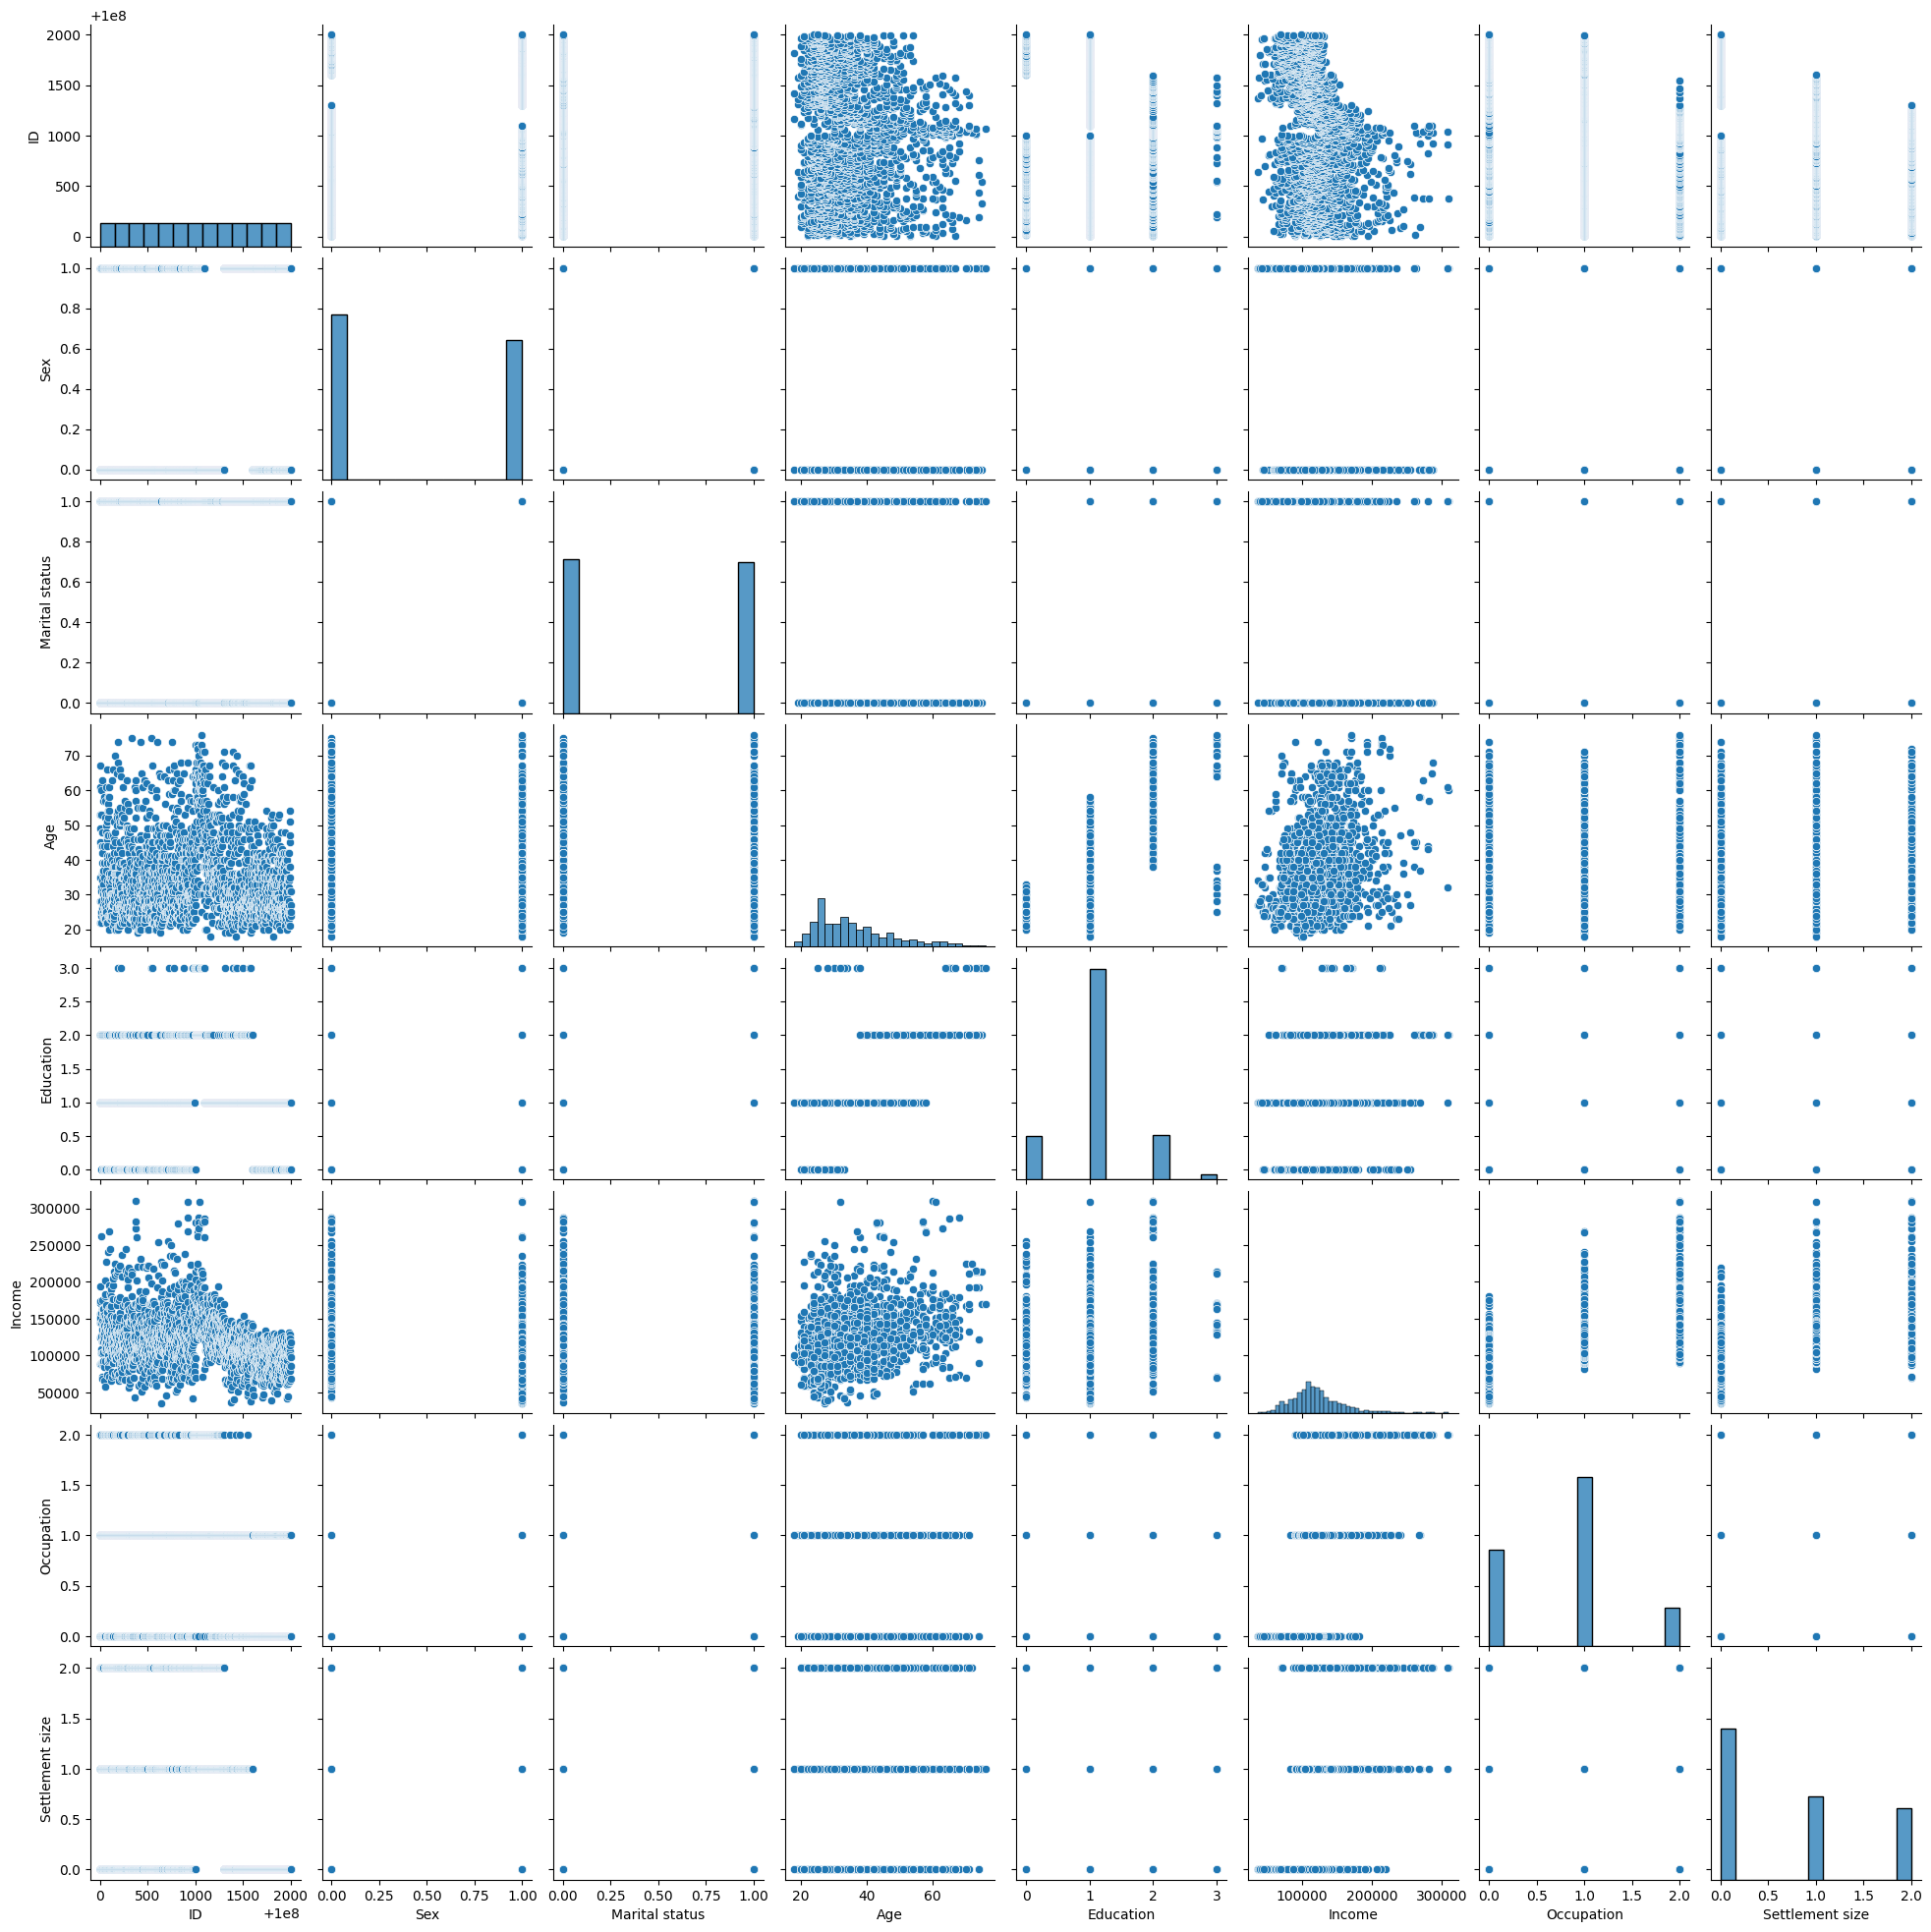

In [15]:
sns.pairplot(df)
plt.show()

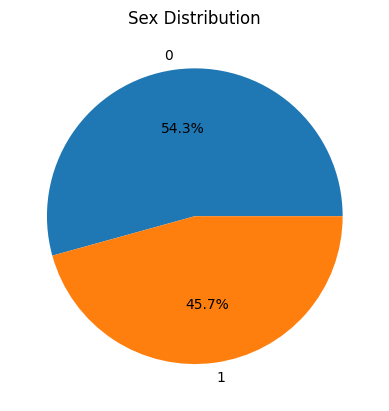

In [16]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique(), autopct='%1.1f%%')
plt.title("Sex Distribution")
plt.show()

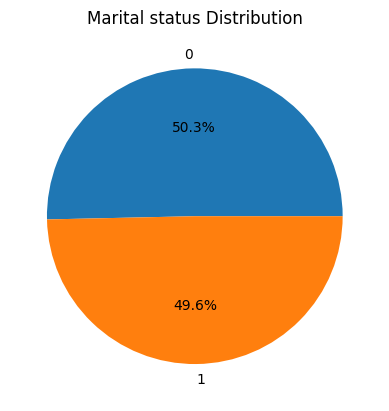

In [17]:
plt.pie(df['Marital status'].value_counts(), labels=df['Marital status'].unique(), autopct='%1.1f%%')
plt.title("Marital status Distribution")
plt.show()

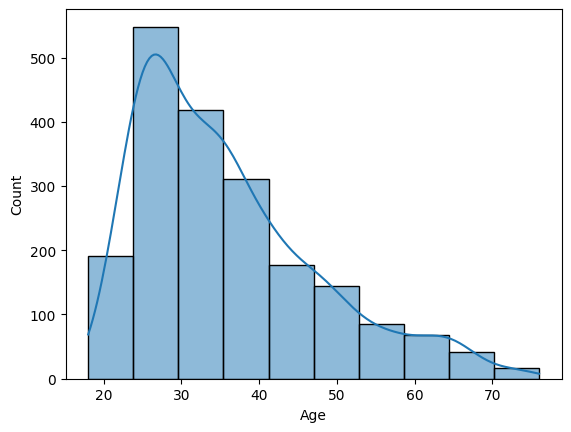

In [18]:
sns.histplot(df['Age'],bins=10,kde=True)
plt.show()

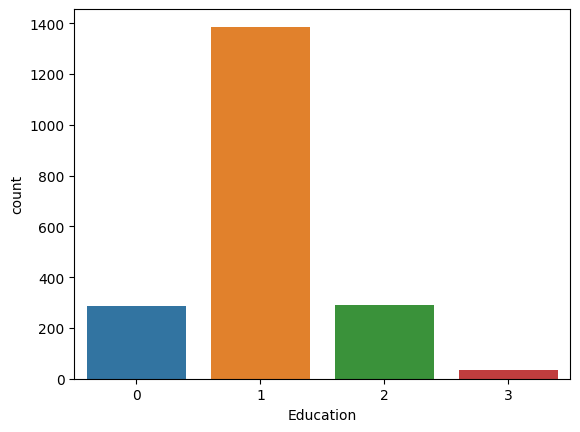

In [19]:
sns.countplot(x='Education',data=df)
plt.show()

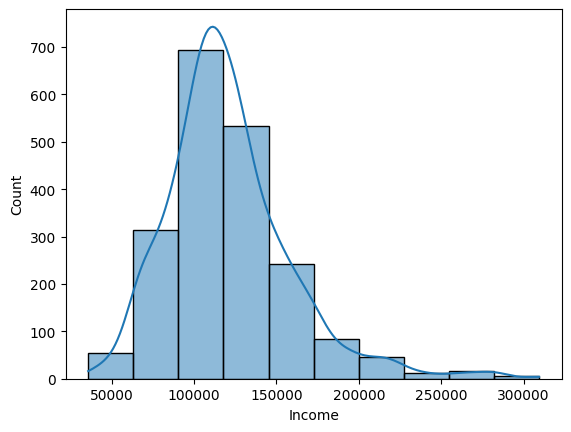

In [20]:
sns.histplot(df['Income'],bins=10,kde=True)
plt.show()

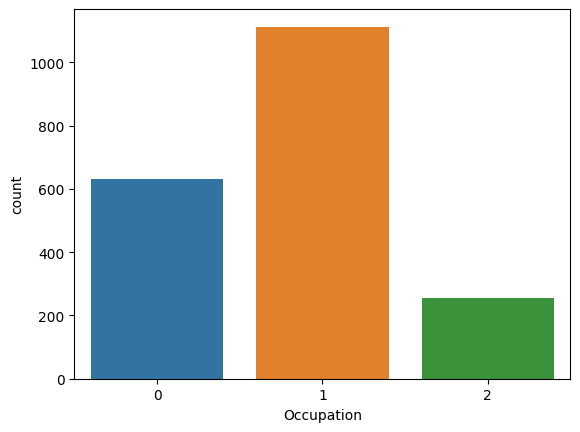

In [21]:
sns.countplot(x='Occupation',data=df)
plt.show()

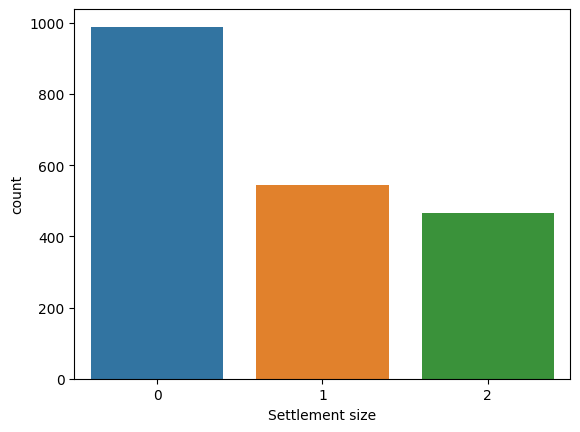

In [22]:
sns.countplot(x='Settlement size',data=df)
plt.show()

**Plot b/w Age and Income**

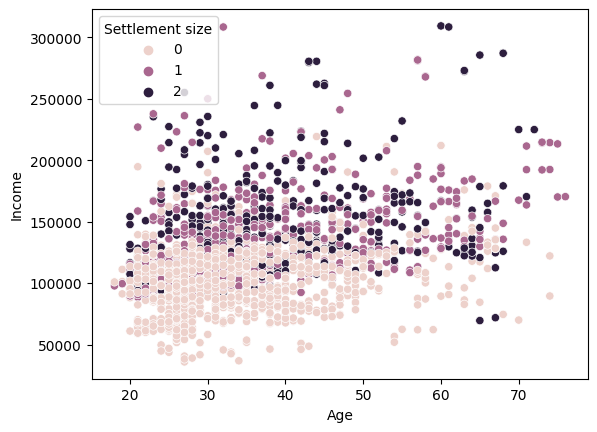

In [23]:
sns.scatterplot(x='Age',y='Income',hue='Settlement size',data=df)
plt.show()

# Data Preprocessing

**No Missing values**

**No Duplicate values**

**No Data Wrangling is needed**

**Dropping ID bcz its not needed in scope of this project**

In [24]:
df.drop(columns='ID',axis=1,inplace=True)

# K-Means Clustering

**Finding WCSS (Within Cluster Sum of Squares) value**

In [25]:
wcss=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[2903113032648.644,
 1214580027362.1716,
 673036781440.1222,
 377129345438.1071,
 248986947113.3495,
 176792874750.12534,
 129547226595.41998,
 96280467517.0448,
 78667682601.67087,
 64505865872.328804]

**Finding K value using Elbow Method**

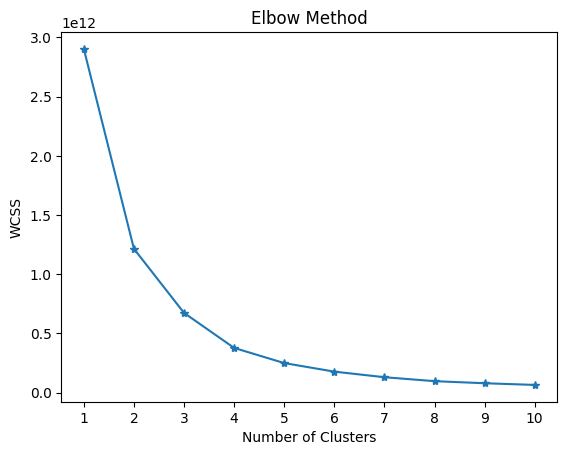

In [26]:
plt.plot(range(1,11), wcss, marker='*')
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=True)
df['km_clusters']=kmeans.fit_predict(df)

**Forming Clusters**

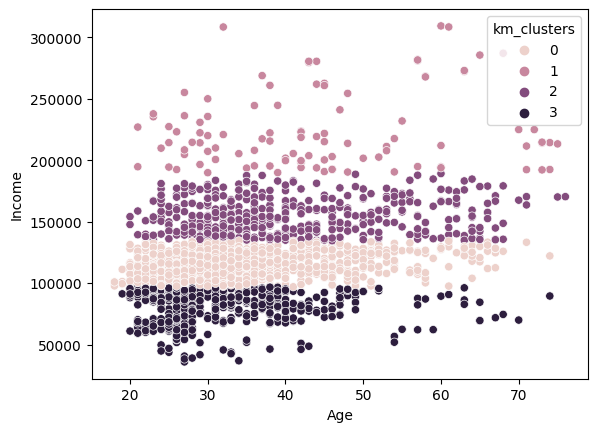

In [28]:
sns.scatterplot(x='Age',y='Income',hue='km_clusters',data=df)
plt.show()

# Hierarchical Clustering

**Forming Dendogram**

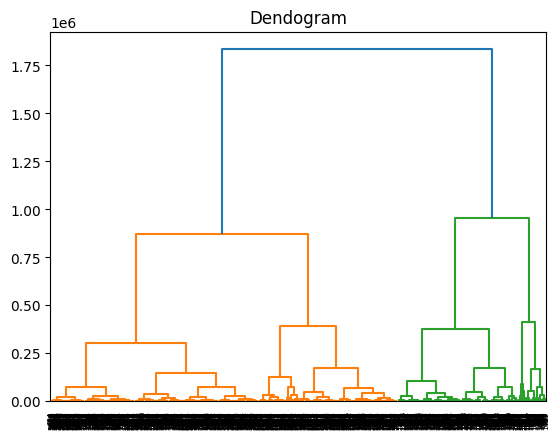

In [29]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(df,method='ward')
dendrogram=sch.dendrogram(data)
plt.title("Dendogram")
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
df["hc_clusters"]=hc.fit_predict(df)

**Forming Clusters**

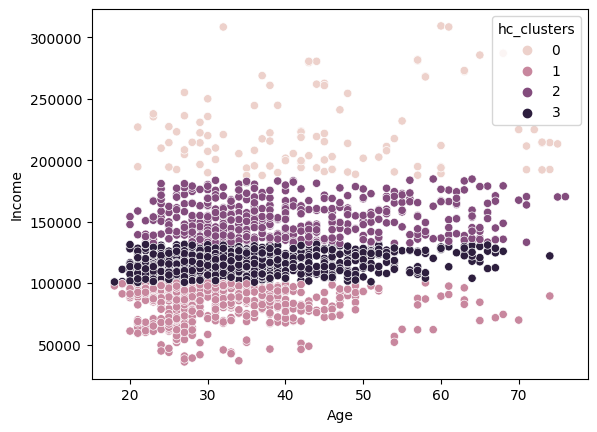

In [31]:
sns.scatterplot(x="Age",y="Income",hue="hc_clusters",data=df)
plt.show()

# DBSCAN Clustering

**Finding best values for radius and min samples**

In [32]:
for r in range(1,50):
    for m in range(4,100):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        df["dbs_clusters"]=dbs.fit_predict(df)
    if df["dbs_clusters"].nunique()==4:
            break
print("eps",r)
print("min",m)

eps 49
min 99


In [33]:
dbs=DBSCAN(eps=49,min_samples=99)
df["dbs_clusters"]=dbs.fit_predict(df)

**Forming Clusters**

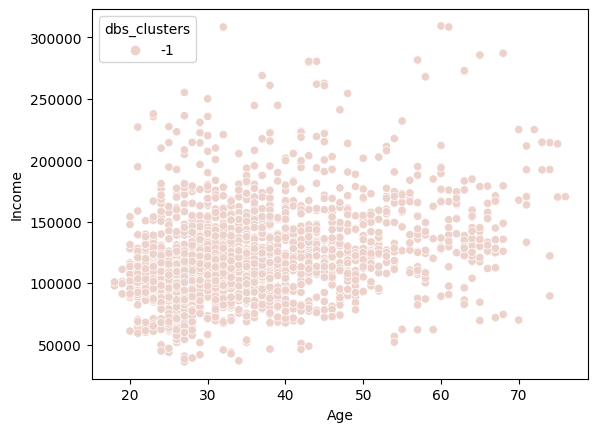

In [34]:
sns.scatterplot(x="Age",y="Income",hue="dbs_clusters",data=df)
plt.show()

# THE END!